In [ ]:
import requests

API_KEY = "68fe9976bc76e1ef78083eb812e01222"
LAT, LON = 35.6895, 139.6917  # Tokyo

url = f"https://api.openweathermap.org/data/2.5/forecast?lat={LAT}&lon={LON}&units=metric&appid={API_KEY}"
r = requests.get(url)
print(r.status_code)
print(r.json())


200
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1760443200, 'main': {'temp': 18.57, 'feels_like': 18.47, 'temp_min': 17.51, 'temp_max': 18.57, 'pressure': 1020, 'sea_level': 1020, 'grnd_level': 1019, 'humidity': 76, 'temp_kf': 1.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 83}, 'wind': {'speed': 6.61, 'deg': 356, 'gust': 7.76}, 'visibility': 10000, 'pop': 0.96, 'rain': {'3h': 1.2}, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-14 12:00:00'}, {'dt': 1760454000, 'main': {'temp': 18.15, 'feels_like': 18.06, 'temp_min': 17.67, 'temp_max': 18.15, 'pressure': 1020, 'sea_level': 1020, 'grnd_level': 1018, 'humidity': 78, 'temp_kf': 0.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 92}, 'wind': {'speed': 5.7, 'deg': 4, 'gust': 5.75}, 'visibility': 10000, 'pop': 0.63, 'rain': {'3h': 0.6}, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-14 15:00:00'}, {'dt': 1760464800, 'main

In [9]:
#IMPORT LIBRARIES
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#API SETUP
API_KEY = "68fe9976bc76e1ef78083eb812e01222"
CITY = "Tokyo"
URL = f"https://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

#FETCH DATA
response = requests.get(URL)
data = response.json()

records = []
for item in data["list"]:
    records.append({
        "datetime": datetime.fromtimestamp(item["dt"]),
        "temp": item["main"]["temp"],
        "humidity": item["main"]["humidity"],
        "pressure": item["main"]["pressure"],
        "wind_speed": item["wind"]["speed"]
    })

df = pd.DataFrame(records)
today = datetime.now().date()
df["type"] = df["datetime"].apply(lambda x: "today" if x.date() == today else "forecast")

print(f"{len(df)} records ({df['datetime'].min()} → {df['datetime'].max()})")

40 records (2025-10-27 03:00:00 → 2025-11-01 00:00:00)


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    40 non-null     datetime64[ns]
 1   temp        40 non-null     float64       
 2   humidity    40 non-null     int64         
 3   pressure    40 non-null     int64         
 4   wind_speed  40 non-null     float64       
 5   type        40 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.0+ KB


,datetime,temp,humidity,pressure,wind_speed
count,40,40.000000,40.000000,40.000000,40.000000
mean,2025-10-16 22:30:00,21.343000,60.800000,1019.300000,5.119750
min,2025-10-14 12:00:00,18.150000,43.000000,1011.000000,0.310000
25%,2025-10-15 17:15:00,19.880000,55.500000,1015.000000,3.875000
50%,2025-10-16 22:30:00,21.420000,62.500000,1021.000000,5.345000
75%,2025-10-18 03:45:00,22.867500,66.000000,1023.000000,6.397500
max,2025-10-19 09:00:00,26.210000,76.000000,1025.000000,10.560000
std,NaN,1.909005,8.382521,4.083739,2.269435


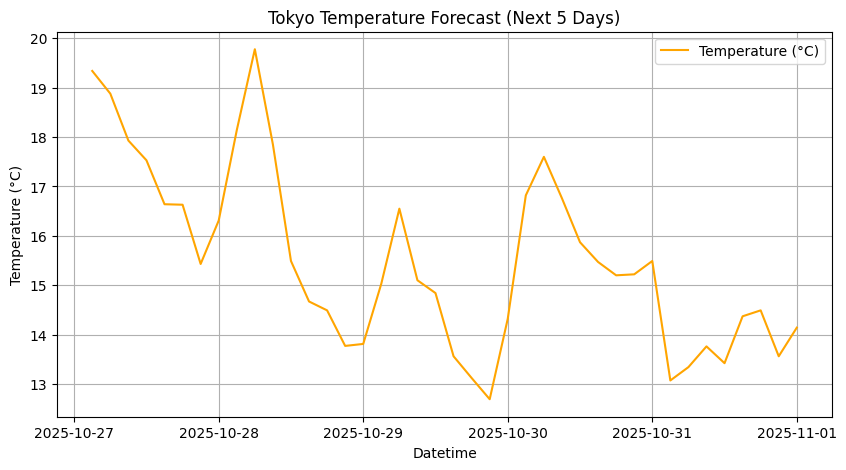

---- Hypothesis 1 ----
T-statistic = 4.030, p-value = 0.002
Reject H₀ → Significant difference between today & forecast temps.


In [4]:
#VISUALIZATION 1: TEMPERATURE TREND
plt.figure(figsize=(10,5))
plt.plot(df["datetime"], df["temp"], color="orange", label="Temperature (°C)")
plt.title(f"{CITY} Temperature Forecast (Next 5 Days)")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

#HYPOTHESIS 1: TODAY vs FORECAST TEMPERATURE
hist_temp = df[df["type"] == "today"]["temp"]
forecast_temp = df[df["type"] == "forecast"]["temp"]

if len(hist_temp) > 1 and len(forecast_temp) > 1:
    t_stat, p_val = stats.ttest_ind(hist_temp, forecast_temp, equal_var=False)
    print("---- Hypothesis 1 ----")
    print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
    if p_val < 0.05:
        print("Reject H₀ → Significant difference between today & forecast temps.")
    else:
        print("Fail to reject H₀ → No significant difference between today & forecast temps.")
else:
    print("Not enough data for t-test (today/forecast).")


---- Hypothesis 2 ----
Correlation (r) = -0.764, p-value = 0.000
❌ Reject H₀ → Significant negative correlation between temp and humidity.


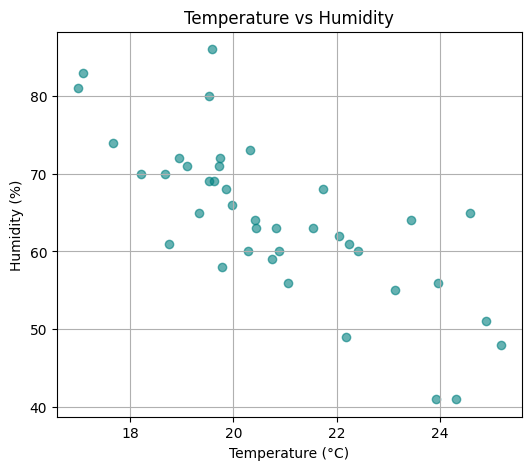

In [ ]:
#HYPOTHESIS 2: TEMP vs HUMIDITY
print("\n---- Hypothesis 2 ----")
r_th, p_th = stats.pearsonr(df["temp"], df["humidity"])
print(f"Correlation (r) = {r_th:.3f}, p-value = {p_th:.3f}")
if p_th < 0.05:
    direction = "negative" if r_th < 0 else "positive"
    print(f"Reject H₀ → Significant {direction} correlation between temp and humidity.")
else:
    print("Fail to reject H₀ → No significant correlation between temp and humidity.")

# Visualization
plt.figure(figsize=(6,5))
plt.scatter(df["temp"], df["humidity"], alpha=0.6, color="teal")
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()


---- Hypothesis 3 ----
Correlation (r) = 0.566, p-value = 0.000
❌ Reject H₀ → Significant positive correlation between temp and wind speed.


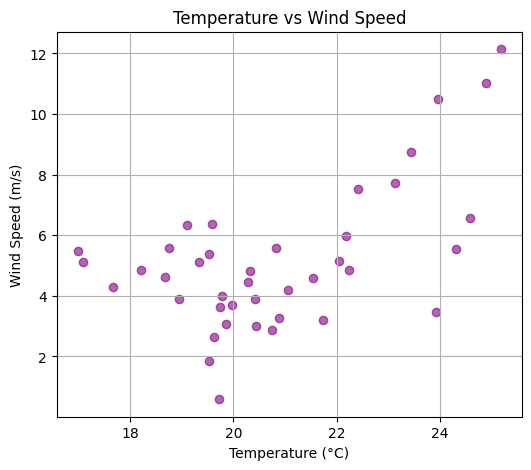

In [ ]:
#HYPOTHESIS 3: TEMP vs WIND SPEED
print("\n---- Hypothesis 3 ----")
r_tw, p_tw = stats.pearsonr(df["temp"], df["wind_speed"])
print(f"Correlation (r) = {r_tw:.3f}, p-value = {p_tw:.3f}")
if p_tw < 0.05:
    direction = "positive" if r_tw > 0 else "negative"
    print(f"Reject H₀ → Significant {direction} correlation between temp and wind speed.")
else:
    print("Fail to reject H₀ → No significant relationship between temp and wind speed.")

# Visualization
plt.figure(figsize=(6,5))
plt.scatter(df["temp"], df["wind_speed"], alpha=0.6, color="purple")
plt.title("Temperature vs Wind Speed")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()



---- Hypothesis 4 ----
Daily mean pressure variance = 93.67
Reject H₀ → Significant variation in daily pressure.


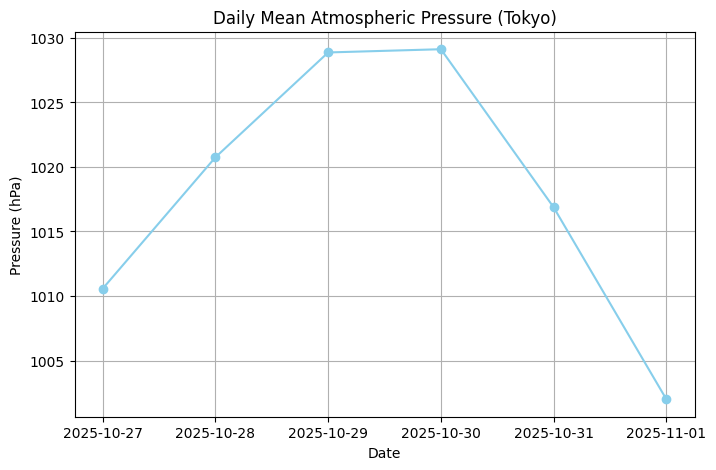

In [10]:
#HYPOTHESIS 4: PRESSURE VARIATION
print("\n---- Hypothesis 4 ----")
df["date"] = df["datetime"].dt.date
daily_mean_pressure = df.groupby("date")["pressure"].mean()
pressure_var = np.var(daily_mean_pressure)
print(f"Daily mean pressure variance = {pressure_var:.2f}")

if pressure_var > 3:  # threshold chosen empirically
    print("Reject H₀ → Significant variation in daily pressure.")
else:
    print("Fail to reject H₀ → Pressure remains stable across forecast period.")

plt.figure(figsize=(8,5))
plt.plot(daily_mean_pressure.index, daily_mean_pressure.values, marker="o", color="skyblue")
plt.title("Daily Mean Atmospheric Pressure (Tokyo)")
plt.xlabel("Date")
plt.ylabel("Pressure (hPa)")
plt.grid(True)
plt.show()

In [ ]:
# Conclusion